In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import openweathermapy.core as owm
import seaborn as sns

In [2]:
import numpy as np

np_lat = np.arange(-90,90,10)
np_lng = np.arange(-180,180,18)
# coordinates = (np_lat,np_lng) #Better keeping lat/lng in separate columns

import random

rnd_lat = random.choice(np_lat)
rnd_lng = random.choice(np_lng)
# rnd_coordinates = random.choice(coordinates) #Better keeping lat/lng in separate columns

from citipy import citipy

weather_df = pd.DataFrame()
weather_df['rnd_lat']=""
weather_df['rnd_lng']=""

for x in np_lat:
    for y in np_lng:
        x_values = list(np.arange(-90,90,0.01))
        y_values = list(np.arange(-180,180,0.01))
        lats = random.sample(x_values,17999) #why 17999 instead of 500? Because of duplicates..
        lons = random.sample(y_values,17999) #..stemming from the geocoords from citipy
                                            #and that's the maximum number of samples I can input
                                            #given the latitude parameters (180/0.01 = 18000)
                                            #Also I believe a larger sampling size to be better to
                                            #increase the random distribution of values.
        
weather_df = weather_df.append(pd.DataFrame.from_dict({"rnd_lat":lats,
                                       "rnd_lng":lons}))

weather_df = weather_df.reset_index(drop=True)



weather_df['city']=""
weather_df['country_code']=""

for index,row in weather_df.iterrows():
        weather_df_city = citipy.nearest_city(row["rnd_lat"], row["rnd_lng"])
        weather_df.set_value(index,"city",weather_df_city.city_name)
        weather_df.set_value(index,"country_code",weather_df_city.country_code)
        
weather_df=weather_df.drop(['rnd_lat', 'rnd_lng'],axis=1) #geo coord don't correspond to cities

weather_df=weather_df.drop_duplicates() #hmmm, some coords might yield similar cities....
print("Sampling size (from n = 17,999) after dumping duplicates: n=" + str(len(weather_df)))

weather_df = weather_df.sample(800) #resample so that n=800 (why? because some cities will may lack
                                    # data for certain attributes, so we'll re-sample once data has
                                    # dropped any rows with NULL values for any attributes)
weather_df = weather_df.reset_index(drop=True) #Remove index pre-resampling

print(weather_df.head())

print("Confirm n = 800: " + str(weather_df.shape))

C:\Users\White Base\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\White Base\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Sampling size (from n = 17,999) after dumping duplicates: n=3323
        city country_code
0     snyder           us
1    niteroi           br
2       ruwi           om
3   falmouth           gb
4  korsakovo           ru
Confirm n = 800: (800, 2)


In [3]:
from config2 import api_key 

    # Set parameters to pass in query URL
units = "metric" 
params = {
    "appid": api_key,
    "units": "metric",
}

    # Set counter for request iteration for each city
counter = 0

    # Set Request Loop
for index, row in weather_df.iterrows():
    params["q"] =f'{row["city"]},{row["country_code"]}' #Set location params: city, country_code
    target_url = 'http://api.openweathermap.org/data/2.5/weather?' #i.e. OWM's base API url

    counter += 1 # add to the index count for each iterations
#     print("Now retrieving city # " + str(counter)) #making sure the counter iteration is working
    
    city_owm = requests.get(target_url, params=params)
    print("ID:"+ str(counter) + " " + "OWM info for " + str( params["q"]))
    print(city_owm.url) #making sure the request iterations are working for each location.
    
    city_owm  = city_owm.json()
    
    #Pull attributes of interest from OWM request
    weather_df.set_value(index,"Latitude",city_owm.get("coord",{}).get("lat"))
    weather_df.set_value(index,"Longitude",city_owm.get("coord",{}).get("lon"))
    weather_df.set_value(index,"Temperature",city_owm.get("main",{}).get("temp_max"))
    weather_df.set_value(index,"Wind_speed",city_owm.get("wind",{}).get("speed"))
    weather_df.set_value(index,"Humidity",city_owm.get("main",{}).get("humidity"))
    weather_df.set_value(index,"Cloudiness",city_owm.get("clouds",{}).get("all"))

ID:1 OWM info for snyder,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=snyder%2Cus


C:\Users\White Base\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\White Base\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\White Base\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\White Base\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\White Base\AppData\Local\conda\conda\envs\PythonData\lib\site-packa

ID:2 OWM info for niteroi,br
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=niteroi%2Cbr
ID:3 OWM info for ruwi,om
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=ruwi%2Com
ID:4 OWM info for falmouth,gb
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=falmouth%2Cgb
ID:5 OWM info for korsakovo,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=korsakovo%2Cru
ID:6 OWM info for aligudarz,ir
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=aligudarz%2Cir
ID:7 OWM info for mrirt,ma
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=mrirt%2Cma
ID:8 OWM info for barawe,so
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=barawe%2Cso
I

ID:60 OWM info for kamaishi,jp
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=kamaishi%2Cjp
ID:61 OWM info for poso,id
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=poso%2Cid
ID:62 OWM info for milledgeville,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=milledgeville%2Cus
ID:63 OWM info for half moon bay,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=half+moon+bay%2Cus
ID:64 OWM info for torzhok,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=torzhok%2Cru
ID:65 OWM info for hede,cn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=hede%2Ccn
ID:66 OWM info for yangambi,cd
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units

ID:117 OWM info for santiago del estero,ar
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=santiago+del+estero%2Car
ID:118 OWM info for constitucion,mx
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=constitucion%2Cmx
ID:119 OWM info for goianesia,br
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=goianesia%2Cbr
ID:120 OWM info for joshimath,in
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=joshimath%2Cin
ID:121 OWM info for kalabo,zm
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=kalabo%2Czm
ID:122 OWM info for ngora,ug
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=ngora%2Cug
ID:123 OWM info for pitiquito,mx
http://api.openweathermap.org/data/2.5/weather?appid=9f874826

ID:173 OWM info for ituni,gy
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=ituni%2Cgy
ID:174 OWM info for bentiu,sd
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=bentiu%2Csd
ID:175 OWM info for la romana,do
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=la+romana%2Cdo
ID:176 OWM info for bonoua,ci
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=bonoua%2Cci
ID:177 OWM info for vallenar,cl
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=vallenar%2Ccl
ID:178 OWM info for witu,ke
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=witu%2Cke
ID:179 OWM info for warrington,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=war

ID:228 OWM info for wakkanai,jp
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=wakkanai%2Cjp
ID:229 OWM info for conceicao da barra,br
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=conceicao+da+barra%2Cbr
ID:230 OWM info for mglin,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=mglin%2Cru
ID:231 OWM info for san juan,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=san+juan%2Cus
ID:232 OWM info for padang,id
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=padang%2Cid
ID:233 OWM info for santa ana,pe
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=santa+ana%2Cpe
ID:234 OWM info for ketchenery,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32

ID:284 OWM info for yerofey pavlovich,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=yerofey+pavlovich%2Cru
ID:285 OWM info for rayachoti,in
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=rayachoti%2Cin
ID:286 OWM info for irbeyskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=irbeyskoye%2Cru
ID:287 OWM info for badarwas,in
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=badarwas%2Cin
ID:288 OWM info for pori,fi
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=pori%2Cfi
ID:289 OWM info for ukiah,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=ukiah%2Cus
ID:290 OWM info for puerto morazan,ni
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e

ID:340 OWM info for alofi,nu
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=alofi%2Cnu
ID:341 OWM info for santa maria del oro,mx
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=santa+maria+del+oro%2Cmx
ID:342 OWM info for halalo,wf
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=halalo%2Cwf
ID:343 OWM info for chateauneuf-les-martigues,fr
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=chateauneuf-les-martigues%2Cfr
ID:344 OWM info for rajula,in
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=rajula%2Cin
ID:345 OWM info for odweyne,so
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=odweyne%2Cso
ID:346 OWM info for mauganj,in
http://api.openweathermap.org/data/2.5/weather?

ID:397 OWM info for buenos aires,co
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=buenos+aires%2Cco
ID:398 OWM info for rabaul,pg
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=rabaul%2Cpg
ID:399 OWM info for cermik,tr
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=cermik%2Ctr
ID:400 OWM info for koroni,gr
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=koroni%2Cgr
ID:401 OWM info for damietta,eg
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=damietta%2Ceg
ID:402 OWM info for kavaratti,in
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=kavaratti%2Cin
ID:403 OWM info for ruidoso,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&uni

ID:453 OWM info for jiuquan,cn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=jiuquan%2Ccn
ID:454 OWM info for acapulco,mx
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=acapulco%2Cmx
ID:455 OWM info for kudahuvadhoo,mv
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=kudahuvadhoo%2Cmv
ID:456 OWM info for shonguy,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=shonguy%2Cru
ID:457 OWM info for wasilla,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=wasilla%2Cus
ID:458 OWM info for clearwater,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=clearwater%2Cus
ID:459 OWM info for bull savanna,jm
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116

ID:509 OWM info for geraldton,ca
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=geraldton%2Cca
ID:510 OWM info for kernersville,us
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=kernersville%2Cus
ID:511 OWM info for voloshka,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=voloshka%2Cru
ID:512 OWM info for tyukhtet,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=tyukhtet%2Cru
ID:513 OWM info for ellisras,za
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=ellisras%2Cza
ID:514 OWM info for kiama,au
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=kiama%2Cau
ID:515 OWM info for marawi,sd
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daa

ID:565 OWM info for sucua,ec
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=sucua%2Cec
ID:566 OWM info for atyuryevo,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=atyuryevo%2Cru
ID:567 OWM info for siatista,gr
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=siatista%2Cgr
ID:568 OWM info for shahpura,in
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=shahpura%2Cin
ID:569 OWM info for grand gaube,mu
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=grand+gaube%2Cmu
ID:570 OWM info for jiayuguan,cn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=jiayuguan%2Ccn
ID:571 OWM info for karakol,kg
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4da

ID:621 OWM info for suez,eg
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=suez%2Ceg
ID:622 OWM info for dangriga,bz
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=dangriga%2Cbz
ID:623 OWM info for whitehorse,ca
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=whitehorse%2Cca
ID:624 OWM info for zhaotong,cn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=zhaotong%2Ccn
ID:625 OWM info for shenjiamen,cn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=shenjiamen%2Ccn
ID:626 OWM info for zhenlai,cn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=zhenlai%2Ccn
ID:627 OWM info for gornopravdinsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4d

ID:677 OWM info for alvorada,br
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=alvorada%2Cbr
ID:678 OWM info for bayan,kw
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=bayan%2Ckw
ID:679 OWM info for coolum beach,au
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=coolum+beach%2Cau
ID:680 OWM info for hellvik,no
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=hellvik%2Cno
ID:681 OWM info for zharkent,kz
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=zharkent%2Ckz
ID:682 OWM info for shahrud,ir
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=shahrud%2Cir
ID:683 OWM info for mukhen,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&unit

ID:733 OWM info for lakes entrance,au
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=lakes+entrance%2Cau
ID:734 OWM info for pocone,br
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=pocone%2Cbr
ID:735 OWM info for buloh kasap,my
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=buloh+kasap%2Cmy
ID:736 OWM info for tombouctou,ml
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=tombouctou%2Cml
ID:737 OWM info for dakar,sn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=dakar%2Csn
ID:738 OWM info for miri,my
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=miri%2Cmy
ID:739 OWM info for vaitupu,wf
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4da

ID:789 OWM info for ossora,ru
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=ossora%2Cru
ID:790 OWM info for vadso,no
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=vadso%2Cno
ID:791 OWM info for codrington,ag
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=codrington%2Cag
ID:792 OWM info for florianopolis,br
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=florianopolis%2Cbr
ID:793 OWM info for taozhuang,cn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=taozhuang%2Ccn
ID:794 OWM info for dingzhou,cn
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32c116922d4daac&units=metric&q=dingzhou%2Ccn
ID:795 OWM info for puerto escondido,mx
http://api.openweathermap.org/data/2.5/weather?appid=9f87482612efa739e32

In [4]:
weather_df = weather_df.dropna()
weather_df = weather_df.sample(500) #resample so that n=500
print(weather_df.shape)
weather_df.head()

(500, 8)


,city,country_code,Latitude,Longitude,Temperature,Wind_speed,Humidity,Cloudiness
691,tripoli,gr,37.51,22.37,13.00,3.10,62.0,20.0
250,hobart,au,-42.88,147.33,10.00,3.60,81.0,75.0
741,yanaul,ru,56.27,54.93,-7.22,1.28,69.0,0.0
732,lakes entrance,au,-37.88,147.99,16.34,1.68,94.0,20.0
581,umiray,ph,15.22,121.41,24.14,2.45,83.0,44.0


(array([16., 34., 39., 52., 56., 58., 81., 81., 65., 18.]),
 array([-46.28 , -33.904, -21.528,  -9.152,   3.224,  15.6  ,  27.976,
         40.352,  52.728,  65.104,  77.48 ]),
 <a list of 10 Patch objects>)

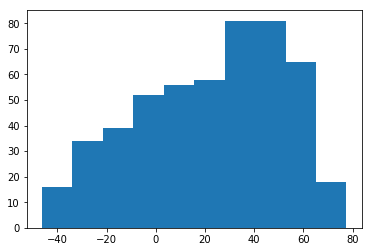

In [5]:
plt.hist(weather_df.Latitude) #To observe the distribution of the latitudinal variable

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.graph_objs import Scatter, Figure, Layout

In [10]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

NameError: name 'iplot' is not defined

In [7]:
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

df = pd.DataFrame({'Latitude': weather_df.Latitude,
                   'Temperature (°C)': weather_df.Temperature,
                   'Wind speed (mph)': weather_df.Wind_speed,
                  'Humidity (%)': weather_df.Humidity,
                   'Cloudiness (%)': weather_df.Cloudiness
                  })
df.head(2)

df.iplot(kind='histogram', subplots=True, shape=(5, 1), filename='weatherpy/histogram-subplots')

PlotlyRequestError: Hi there! Free users cannot create folders.

To save this file on Plotly, please remove the folder in your filename path.

If you would like to create folders and save files in them, please upgrade your account at: https://goo.gl/NrPpg6 